In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Load Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yigitatesh/ml/main/datasets/cars_updated.csv")

In [3]:
df.head(3)

,height,length,width,driveline,engine,gears,transmission,cty,fuel_type,hwy,id,make,model_year,year,hp,torque,model,km_per_l_cty,km_per_l_hwy
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,6,Automatic,18,Gasoline,25,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236,Audi A3,6.343612,8.810573
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,Automatic,22,Gasoline,28,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207,Audi A3,7.753304,9.867841
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,6,Manual,21,Gasoline,30,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207,Audi A3,7.400881,10.572687


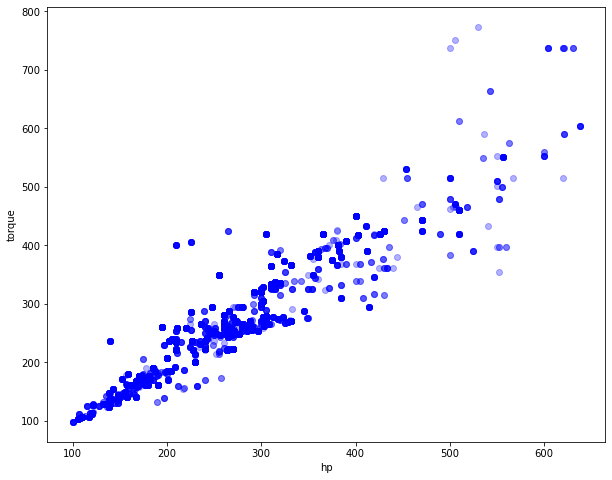

In [4]:
# plot torque and hp values
X = df["hp"].values
y = df["torque"].values

plt.figure(figsize=(10, 8))
plt.xlabel("hp")
plt.ylabel("torque")
plt.scatter(X, y, color="blue", alpha=0.3)

## Linear Regression

Target is finding the best line fit<br>
$$
    \hat{y} = w .X + b
$$

Minimizing the Error:<br>
$$
    Error = (y - \hat{y})^2 \\
          = (y - (w .X + b))^2 \\
          = (y - w.X - b)^2
$$

Gradients:<br>
$$
    \frac{dJ}{dw} = 2.(y - \hat{y}).(-X) \\
    \frac{dJ}{db} = 2.(y - \hat{y}).(-1)
$$

Updating Weights: <br>
Repeat for some number of iterations: <br>
$$
\omega^+ = \omega - \alpha.\frac{dJ}{d\omega}\\
b^+ = b - \alpha.\frac{dJ}{db}\\
$$

Cost 
$$
\frac{1}{m}.\sum_{i=0}^{m}(y_i - \hat{y}_i)^2
$$

In [5]:
# Linear Regression class




In [7]:
# fit
lr = LinearRegression(lr=0.01, max_iter=100).fit(X, y)

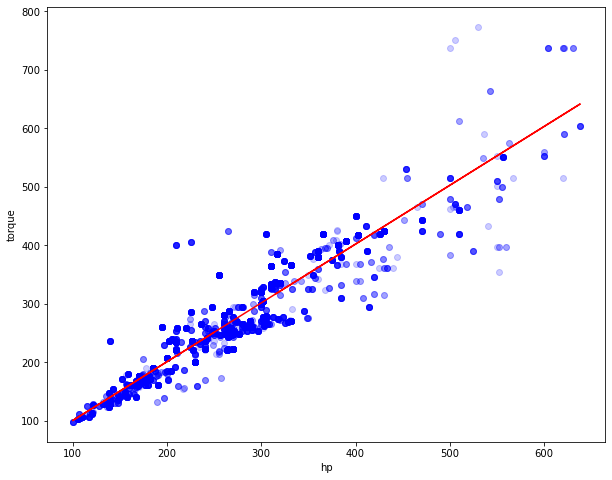

In [8]:
# plot the fitted line
preds = lr.predict(X)

plt.figure(figsize=(10, 8))
plt.xlabel("hp")
plt.ylabel("torque")
plt.scatter(X, y, color="blue", alpha=0.2)
plt.plot(X, preds, color="red")

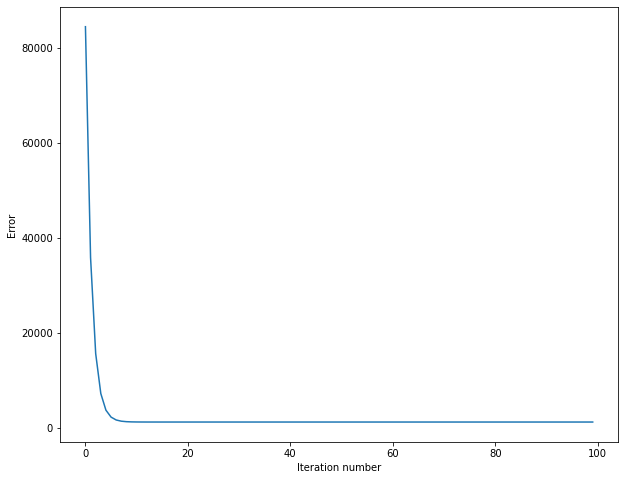

In [9]:
# plot costs
costs = lr.costs

plt.figure(figsize=(10, 8))
plt.xlabel("Iteration number")
plt.ylabel("Error")
plt.plot(range(len(costs)), costs)

## Plot Linear Regression Line in learning phase

In [92]:
# class which plots linear regression
# Linear Regression class
class LinearRegression:
    def __init__(self, lr=0.01, max_iter=100):
        self.lr = lr
        self.max_iter = max_iter
    
    def fit(self, X, y):
        self.w = 0
        self.b = 0
        
        self.costs = []
        
        # create figure for plotting
        fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18, 8))
        axes = axes.ravel()
        
        for i in range(self.max_iter):
            # predict output
            preds = self.predict(X)
            
            # calculate cost
            cost = np.mean((y - preds) ** 2)
            
            # plot linear regression line of current iteration
            if i < 15:
                axes[i].scatter(X, y, color="blue", alpha=0.3)
                axes[i].plot(X, preds, color="red")
                axes[i].set_title("iteration: {}\ncost: {}\nw: {}  b: {}".format(i+1, round(cost), 
                                                                                 round(self.w, 2), 
                                                                                 round(self.b, 3)))
            
            # gradients
            d_w = np.mean(2 * (y - preds) * (-X))
            d_b = np.mean(2 * (y - preds) * (-1))
            
            self.w = self.w - self.lr * d_w
            self.b = self.b - self.lr * d_b
            
            self.costs.append(cost)
        
        # adjust spaces between plots
        plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.6, wspace=0.2)
    
        return self
        
    def predict(self, X):
        return self.w * X + self.b
    
    def score(self, X, y):
        """R^2 score -> 1 - u/v"""
        preds = self.predict(X)
        u = ((y - preds) ** 2).mean()
        v = ((y - y.mean()) ** 2).mean()
        return 1 - u / v

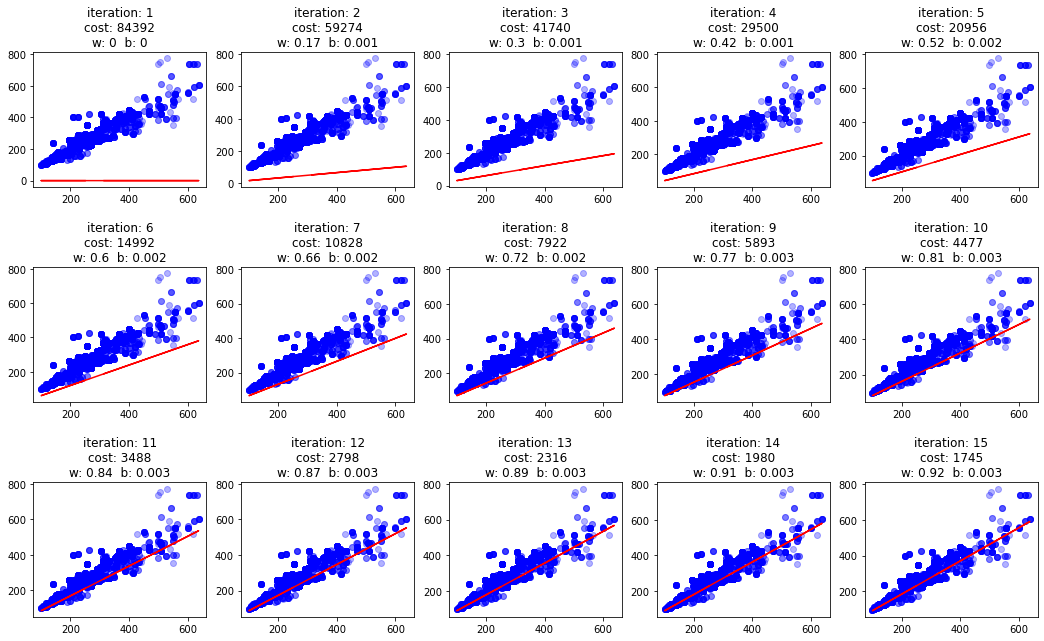

In [93]:
# fit and show learning steps
lr = LinearRegression(lr=0.000001).fit(X, y)

## 3D Cost Plot

In [76]:
# on jupyter notebook, uncomment below line
#%matplotlib notebook

In [77]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

<IPython.core.display.Javascript object>


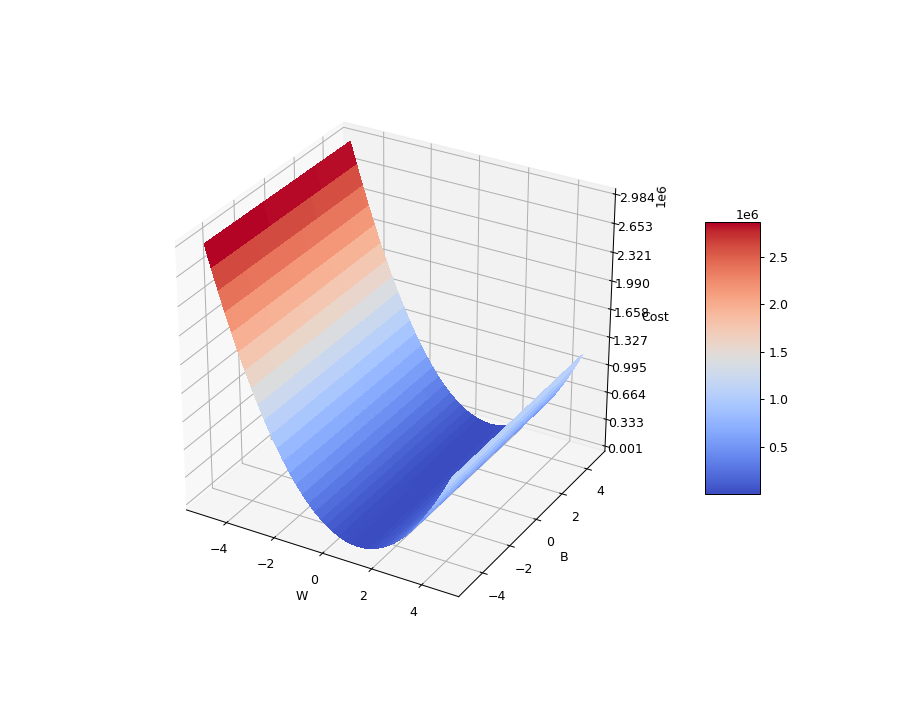

In [78]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 8))

# Make data.
W = np.arange(-5, 5, 0.25)
B = np.arange(-5, 5, 0.25)
W, B = np.meshgrid(W, B)
Cost = np.zeros_like(W)
for i in range(Cost.shape[0]):
    for j in range(Cost.shape[1]):
        preds = W[i][j] * X + B[i][j]
        Cost[i][j] = np.sum((y - preds) ** 2) / len(y)

# Plot the surface.
surf = ax.plot_surface(W, B, Cost, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel("W")
ax.set_ylabel("B")
ax.set_zlabel("Cost")

plt.show()

In [76]:
print(lr.w, lr.b)

1.005685026186137 0.004638462942348566


## Ridge Regression

Target is finding the best line fit<br>
$$
    \hat{y} = w .X + b
$$

Minimizing the Error:<br>
$$
    Error = (y - \hat{y})^2 + \lambda.w^2\\
          = (y - (w .X + b))^2 + \lambda.w^2\\
          = (y - w.X - b)^2 + \lambda.w^2
$$

Gradients:<br>
$$
    \frac{dJ}{dw} = 2.(y - \hat{y}).(-X) + 2.\lambda.w\\
    \frac{dJ}{db} = 2.(y - \hat{y}).(-1)
$$

Updating Weights: <br>
Repeat for some number of iterations: <br>
$$
\omega^+ = \omega - \alpha.\frac{dJ}{d\omega}\\
b^+ = b - \alpha.\frac{dJ}{db}\\
$$

Cost 
$$
\frac{1}{m}.\sum_{i=0}^{m}(y_i - \hat{y}_i)^2 + \frac{1}{k}.\lambda.\sum_{j=0}^{k}w_j^2
$$

In [ ]:
# Ridge Regression class



In [ ]:
# fit
rr = RidgeRegression(lambd=0.1).fit(X, y)

In [ ]:
# plot the fitted line
preds = rr.predict(X)

plt.figure(figsize=(10, 8))
plt.xlabel("hp")
plt.ylabel("torque")
plt.scatter(X, y, color="blue", alpha=0.2)
plt.plot(X, preds, color="red")

In [ ]:
rr.score(X, y)

0.8800131400641861

In [ ]:
rr.score(X, y) - lr.score(X, y)

9.002798506685394e-13

# Polynomial Regression

In [106]:
%matplotlib inline

In [107]:
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 

### What polynomial regression does ?

In [24]:
poly = PolynomialFeatures(degree=2)

X = np.arange(1, 10)

X_trans = poly.fit_transform(X.reshape(-1, 1))

In [25]:
X.reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [26]:
X_trans # 1, x, x^2

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.],
       [ 1.,  7., 49.],
       [ 1.,  8., 64.],
       [ 1.,  9., 81.]])

## Load Nonlinear Regression Data

In [108]:
df = pd.read_csv("https://raw.githubusercontent.com/yigitatesh/ml/main/datasets/nonlinear.csv").iloc[:, 1:]
df.head()

,0,1
0,97.58776,1.0
1,97.76344,2.0
2,96.56705,3.0
3,92.52037,4.0
4,91.15097,5.0


In [109]:
X = df.iloc[:, 1].values
y = df.iloc[:, 0].values

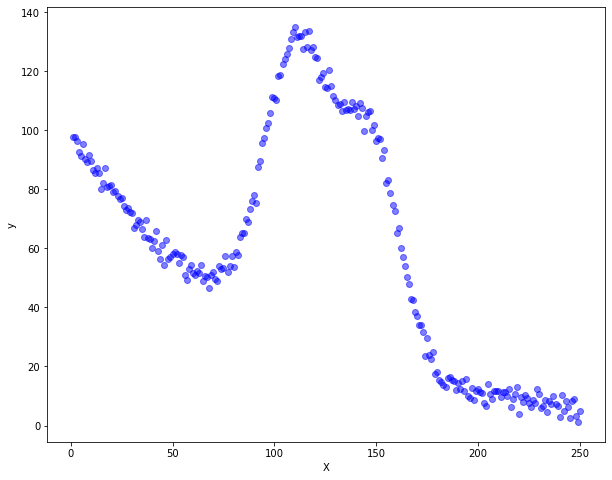

In [110]:
# visualize the data
plt.figure(figsize=(10, 8))
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(X, y, color="blue", alpha=0.5)

## Fit Polynomial Regression

In [3]:
# fit polynomial regression





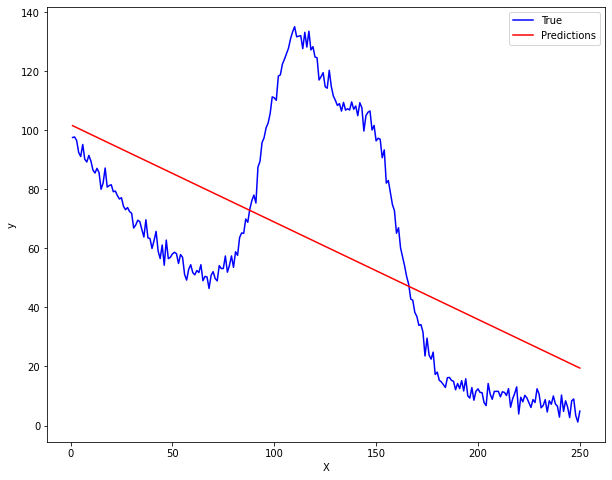

In [ ]:
# visualize nonlinear regression
preds = lr.predict(X_trans)

plt.figure(figsize=(10, 8))
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(X, y, color="blue", alpha=0.5, label="True")
plt.plot(X, preds, color="red", label="Predictions")
plt.legend()

## Fit different degrees

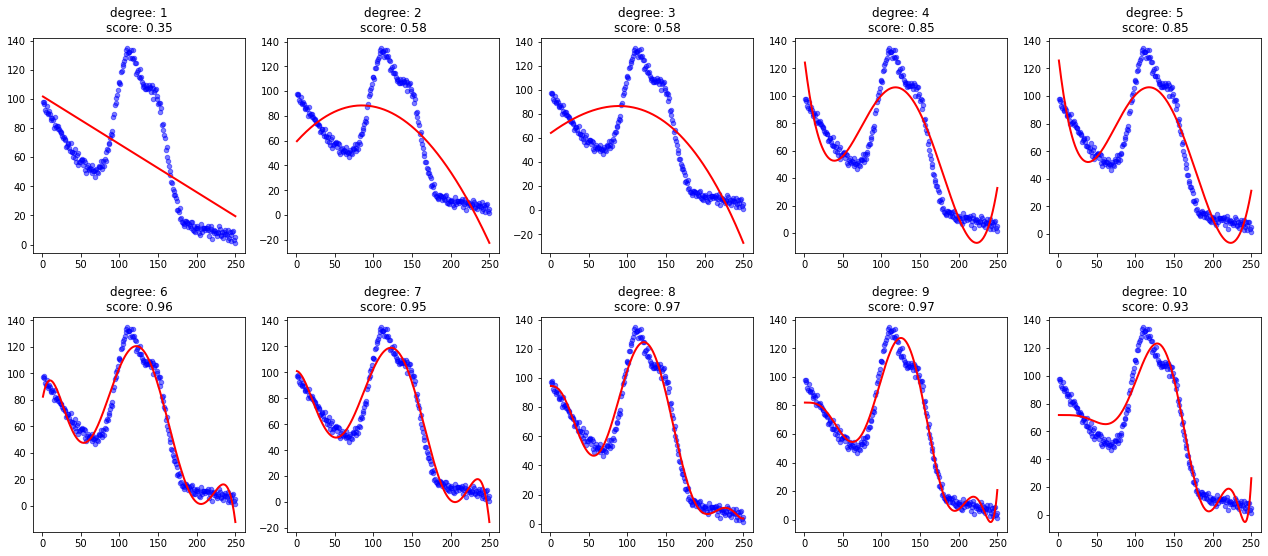

In [129]:
# fit degrees between 1 and 10 and plot them
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(22, 7))
axes = axes.ravel()

degrees = list(range(1, 11))

for i in range(len(degrees)):
    degree = degrees[i]
    
    # fit polynomial regression
    poly = PolynomialFeatures(degree=degree)
    X_trans = poly.fit_transform(X.reshape(-1, 1))

    lr = LinearRegression().fit(X_trans, y)
    preds = lr.predict(X_trans)

    # plot regression line
    axes[i].scatter(X, y, color="blue", alpha=0.5, s=20)
    axes[i].plot(X, preds, color="red", linewidth=2)
    axes[i].set_title("degree: {}\nscore: {}".format(degree, round(lr.score(X_trans, y), 2)))

# adjust spaces between plots
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.2)

## Bias Variance Tradeoff

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
# prepare train and test data
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.25, random_state=1)

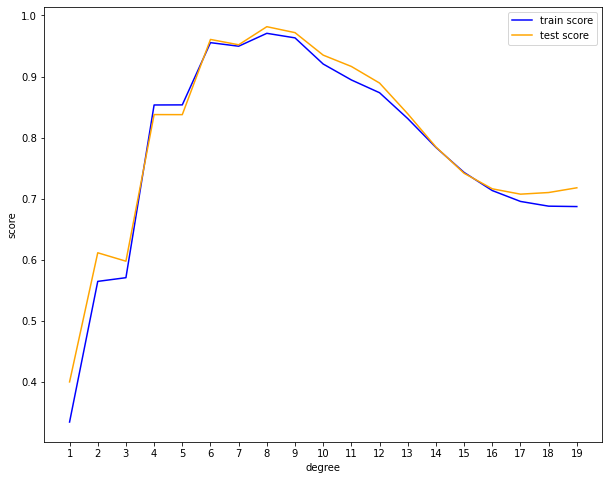

In [148]:
# plot train and test scores by degrees
train_scores, test_scores = [], []

degrees = list(range(1, 20))
for degree in degrees:
    # fit polynomial regression by current degree
    poly = PolynomialFeatures(degree=degree)
    X_train_trans = poly.fit_transform(X_train)
    X_test_trans = poly.transform(X_test)

    lr = LinearRegression().fit(X_train_trans, y_train)

    # test and train scores
    train_scores.append(lr.score(X_train_trans, y_train))
    test_scores.append(lr.score(X_test_trans, y_test))

# plot scores
plt.figure(figsize=(10, 8))
plt.xlabel("degree")
plt.ylabel("score")
plt.plot(degrees, train_scores, color="blue", label="train score")
plt.plot(degrees, test_scores, color="orange", label="test score")
plt.xticks(degrees)
plt.legend()

# House Pricing Data

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [8]:
url = "https://raw.githubusercontent.com/yigitatesh/ml/main/datasets/house_data.csv"

In [10]:
# read house prices data
df = pd.read_csv(url)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,12,2008,250000


## Create Train and Test Data

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Scale X data to range of 0-1

In [38]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Fit Linear Regression

In [41]:
lr = LinearRegression().fit(X_train_scaled, y_train)

In [42]:
print("train score: {}".format(lr.score(X_train_scaled, y_train)))
print("test score : {}".format(lr.score(X_test_scaled, y_test)))

train score: 0.8448795710037176
test score : 0.683326921507388


## Fit Ridge Regression

In [65]:
rr = Ridge(alpha=0.1).fit(X_train_scaled, y_train)

In [66]:
print("train score: {}".format(rr.score(X_train_scaled, y_train)))
print("test score : {}".format(rr.score(X_test_scaled, y_test)))

train score: 0.8448654510469256
test score : 0.6840558725401542


## Fit Lasso Regression

In [91]:
ls = Lasso(alpha=0.1).fit(X_train_scaled, y_train)

In [92]:
print("train score: {}".format(ls.score(X_train_scaled, y_train)))
print("test score : {}".format(ls.score(X_test_scaled, y_test)))

train score: 0.8448795653472925
test score : 0.6833378035303448
